**Task 3 : Predict using decision tree algorithm**

**submitted by : Trashi Singh**

**Importing the Required Libraries and Reading the data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.tree import plot_tree

# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


**loading data into notebook**

In [2]:
df = pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#looking for imbalance in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
target = df['Species']
df1 = df.copy()
df1 = df1.drop('Species', axis =1)
df1.shape
df2 = df1.copy()
df2 = df2.drop('Id', axis = 1)
df2.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


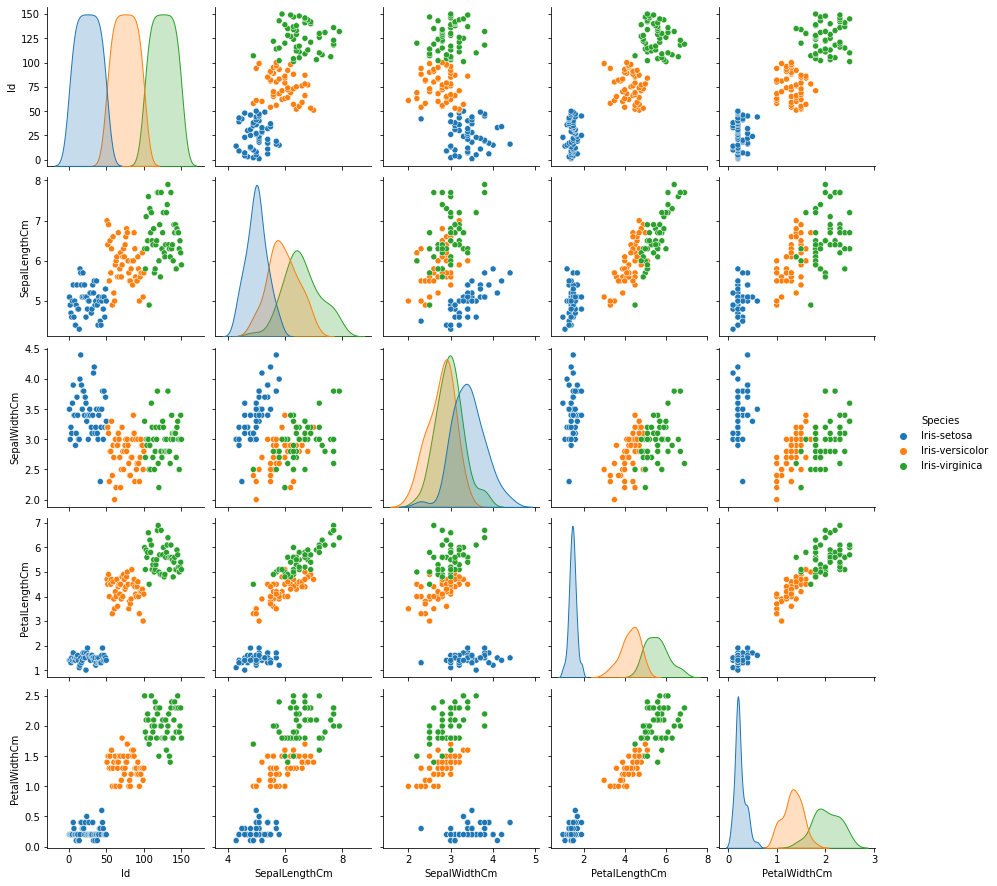

In [5]:
# No Null values observed 
# let's plot pair plot to visualise the attributes all at once

sns.pairplot(df, hue = 'Species')

[]

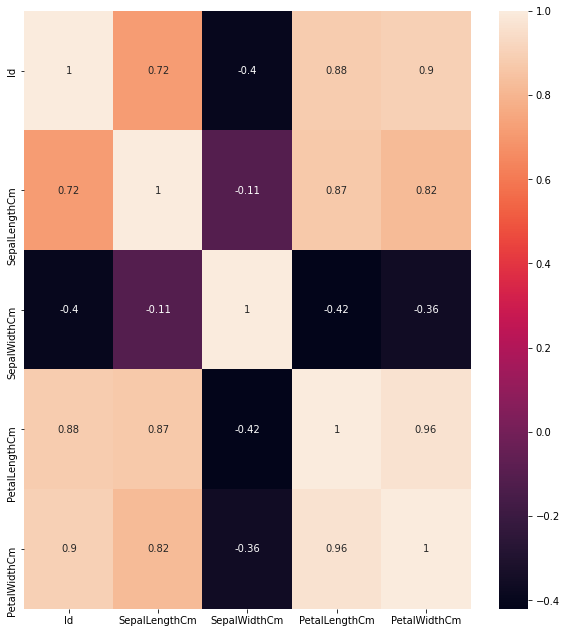

In [6]:
# correlation matrix
plt.figure(figsize=(10,11))
sns.heatmap(df.corr(),annot=True)
plt.plot()

-Observations made
-Petal length is highly related to petal width.
-Sepal lenth is not related sepal width.








**Let's see that how the categorical feature “Species” is distributed with all other four input variables.**

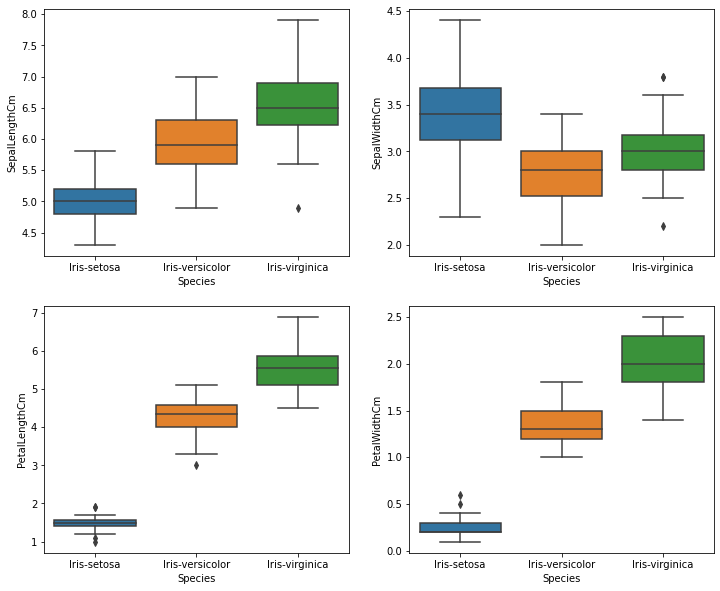

In [7]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x=df["Species"],y=df['SepalLengthCm'])
plt.subplot(2,2,2)
sns.boxplot(x=df["Species"],y=df["SepalWidthCm"])
plt.subplot(2,2,3)
sns.boxplot(x=df["Species"],y=df["PetalLengthCm"])
plt.subplot(2,2,4)
sns.boxplot(x=df["Species"],y= df["PetalWidthCm"])

In [8]:
X = df.iloc[:, [0, 1, 2, 3]].values #Attributes

le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

y = df['Species'].values  #Labels

print("The shape of the data is-", df.shape)

The shape of the data is- (150, 6)


**Model Training**


Let us split the data into test and train for trainig our model.

In [9]:
# Splitting the data - 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 42 )

print("Training split - ", X_train.shape)
print("Testing split - ", X_test.shape)

Training split -  (120, 4)
Testing split -  (30, 4)


In [10]:
# Defining the decision tree algorithm

dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


In [11]:
dtree.score(X_train, y_train)

1.0

In [12]:
# Predicting the values of test data
y_pred = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(0.5, 1.0, 'Accuracy Score: 1.0')

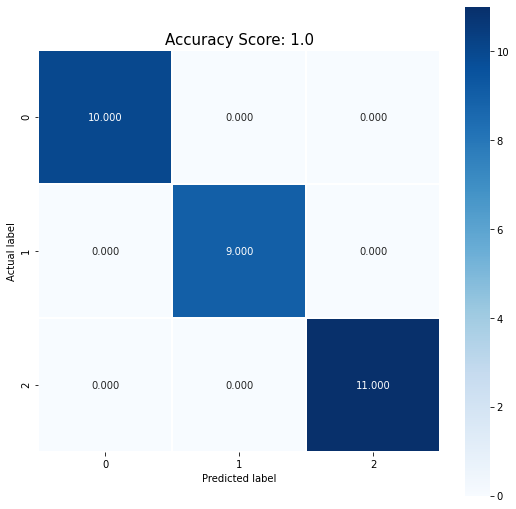

In [13]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,9))

sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues');

plt.ylabel('Actual label');
plt.xlabel('Predicted label');

all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

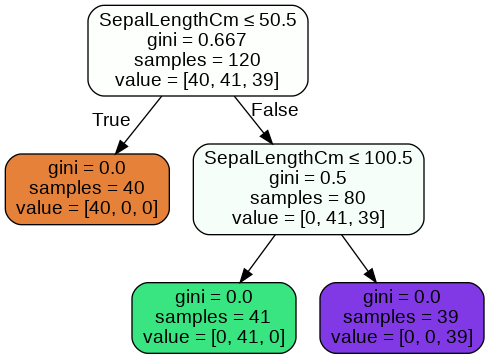

In [14]:
# Visualize the graph
dot_data = StringIO()

export_graphviz(dtree, out_file=dot_data, feature_names = df2.columns, filled=True, rounded=True,special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

**Now feeding any new/test data to this classifer and it would be able to predict the right class accordingly.**

In [15]:
dtree.predict([[3.5, 1.9, 5.2, 2.4]])

array([0])

In [16]:
dtree.predict([[4.6, 2.9, 3.6, 5.9]])

array([0])

**THANK YOU**